### EDA

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./sentimentdataset.csv")

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2  

In [3]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


#### Inconsistency noticed. Some countries have a extra space in the beginning

In [4]:
df['Country'] = df['Country'].str.strip().str.upper()


#### Top 10 sentiments found

<ipython-input-5-165a36864c53>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette='coolwarm')


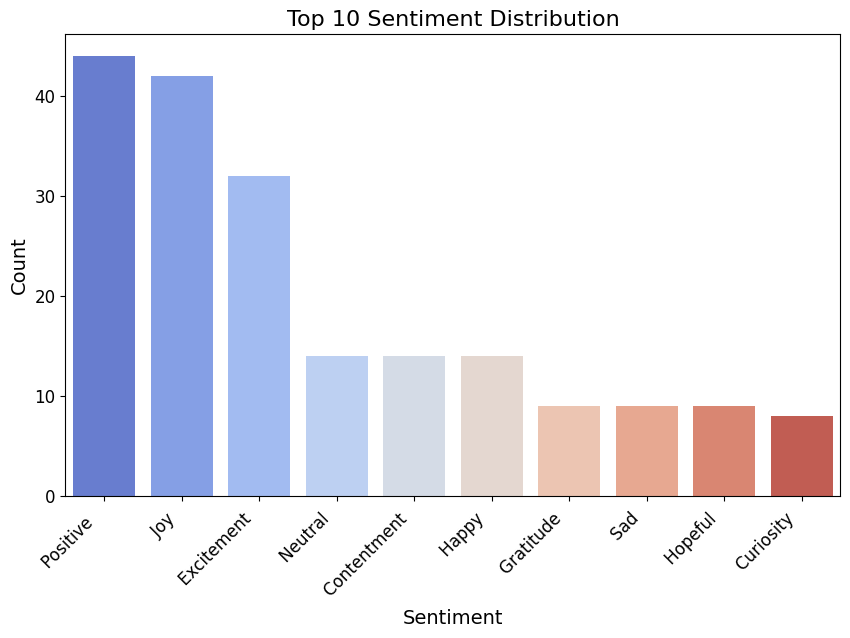

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 most frequent sentiment labels
top_sentiments = df['Sentiment'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))  # Larger figure for clarity
sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette='coolwarm')

# Improve readability
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x labels
plt.yticks(fontsize=12)  # Make y-axis readable

plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Top 10 Sentiment Distribution", fontsize=16)

plt.show()


#### Text Length Analysis

count    732.000000
mean      13.206284
std        4.853229
min        4.000000
25%        9.000000
50%       13.000000
75%       17.000000
max       25.000000
Name: Text_Length, dtype: float64


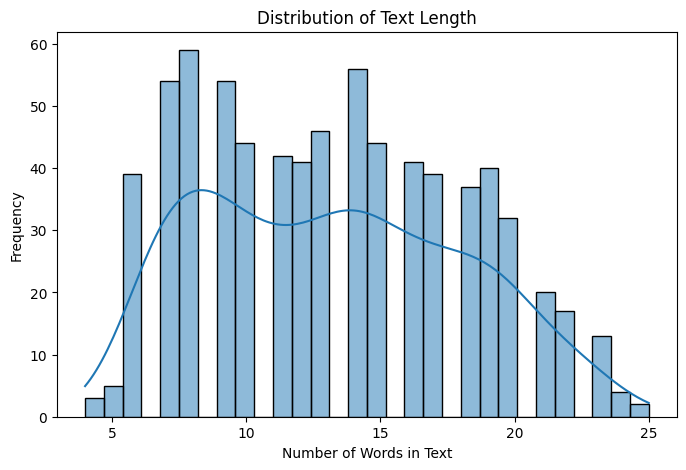

In [6]:
# Add a new column for text length
df['Text_Length'] = df['Text'].apply(lambda x: len(str(x).split()))

# Summary statistics for text length
print(df['Text_Length'].describe())

# Visualizing text length distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words in Text")
plt.ylabel("Frequency")
plt.show()


#### Check for duplicate rows

In [7]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# If needed, remove duplicates
df = df.drop_duplicates()


Duplicate Rows: 0


#### Most Common Words

<ipython-input-8-c8262c015050>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


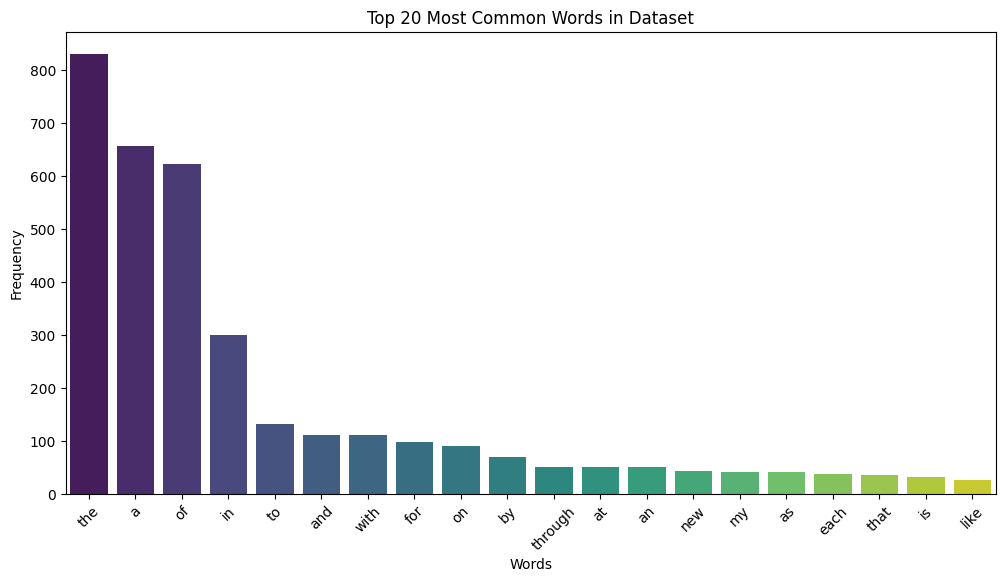

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Function to clean text (basic)
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters/numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning
df['Clean_Text'] = df['Text'].apply(clean_text)

# Get most common words
all_words = " ".join(df['Clean_Text']).split()
word_freq = Counter(all_words)

# Get top 20 words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)  # Separate words and their counts

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Dataset")
plt.show()


#### Understanding other features

In [9]:
# Check unique values in categorical columns
categorical_cols = ['Platform', 'Country', 'User']
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].nunique()}")

# Check the impact of retweets/likes
print(df[['Retweets', 'Likes']].describe())


Unique values in Platform: 4
Unique values in Country: 33
Unique values in User: 685
         Retweets       Likes
count  732.000000  732.000000
mean    21.508197   42.901639
std      7.061286   14.089848
min      5.000000   10.000000
25%     17.750000   34.750000
50%     22.000000   43.000000
75%     25.000000   50.000000
max     40.000000   80.000000


#### Sentiment Distribution (Class Imbalance)

In [10]:
# Calculate percentage of each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution (%):\n", sentiment_counts)


Sentiment Distribution (%):
 Sentiment
Positive         6.010929
Joy              5.737705
Excitement       4.371585
Neutral          1.912568
Contentment      1.912568
                   ...   
Triumph          0.136612
Heartwarming     0.136612
Obstacle         0.136612
Sympathy         0.136612
Pressure         0.136612
Name: proportion, Length: 279, dtype: float64


#### Likes vs Sentiment
- We tried to observe how does the number of likes change with the sentiment.
- Which sentiment is getting most number of likes. Which sentiment is generally getting lesser number of likes

<ipython-input-11-243d44b66ecb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_top['Sentiment'], y=df_top['Likes'], palette='coolwarm')


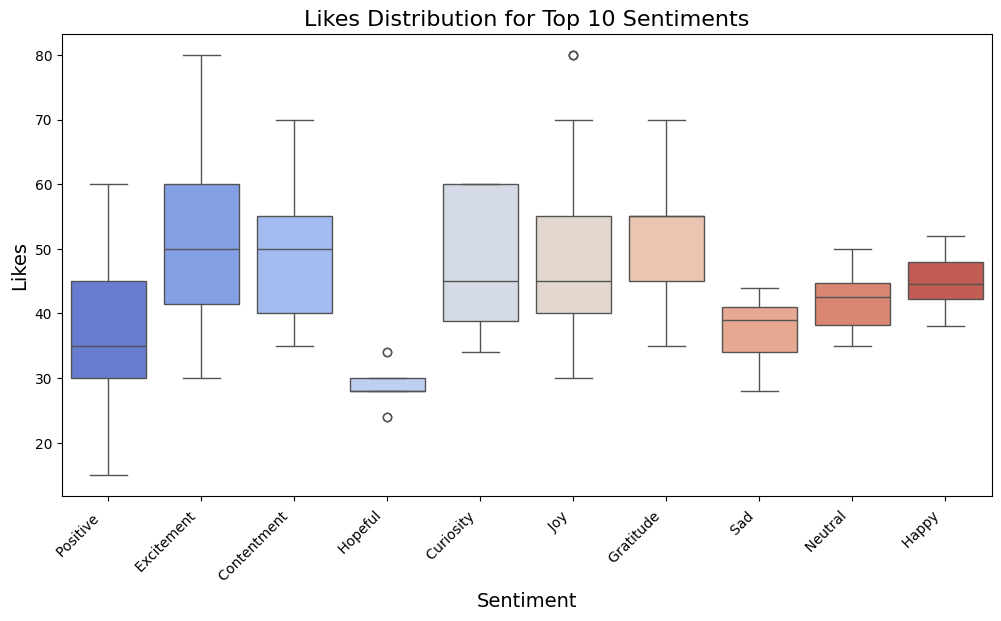

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent sentiments
top_n = 10
top_sentiments = df['Sentiment'].value_counts().nlargest(top_n).index
df_top = df[df['Sentiment'].isin(top_sentiments)]

plt.figure(figsize=(12, 6))  # Increase figure size
sns.boxplot(x=df_top['Sentiment'], y=df_top['Likes'], palette='coolwarm')

plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Likes", fontsize=14)
plt.title(f"Likes Distribution for Top {top_n} Sentiments", fontsize=16)
plt.show()


In [12]:
import pandas as pd

# Get the top 10 most frequent sentiments
top_n = 10
top_sentiments = df['Sentiment'].value_counts().nlargest(top_n).index
df_top_likes = df[df['Sentiment'].isin(top_sentiments)][['Sentiment', 'Likes']]

# Compute median, IQR, and spread for each sentiment
likes_stats = df_top_likes.groupby('Sentiment')['Likes'].describe()[['50%', 'std', '25%', '75%']]
likes_stats.rename(columns={'50%': 'Median', 'std': 'Std Dev', '25%': 'Q1', '75%': 'Q3'}, inplace=True)

# Compute IQR (Interquartile Range) and Spread (Max - Min)
likes_stats['IQR'] = likes_stats['Q3'] - likes_stats['Q1']
likes_stats = likes_stats.sort_values(by='Median', ascending=False)

# Extract insights
highest_median_sentiment = likes_stats['Median'].idxmax()
widest_spread_sentiment = likes_stats['IQR'].idxmax()
lowest_engagement_sentiment = likes_stats['Median'].idxmin()

# Display results
print("Sentiment with Highest Median Likes:", highest_median_sentiment)
print("Sentiment with Widest Spread (High Variability):", widest_spread_sentiment)
print("Sentiment with Lowest Engagement (Low Median, Small IQR):", lowest_engagement_sentiment)

# Display the stats table
print("\nLikes Distribution Statistics for Top 10 Sentiments:\n", likes_stats)


Sentiment with Highest Median Likes:  Gratitude 
Sentiment with Widest Spread (High Variability):  Curiosity 
Sentiment with Lowest Engagement (Low Median, Small IQR):  Hopeful 

Likes Distribution Statistics for Top 10 Sentiments:
               Median    Std Dev     Q1     Q3    IQR
Sentiment                                           
Gratitude       55.0  10.307764  45.00  55.00  10.00
Contentment     50.0  11.413314  40.00  55.00  15.00
Excitement      50.0  12.160055  41.50  60.00  18.50
Curiosity       45.0  11.185929  38.75  60.00  21.25
Joy             45.0  13.115320  40.00  55.00  15.00
Happy           44.5   4.329810  42.25  48.00   5.75
Neutral         42.5   4.827235  38.25  44.75   6.50
Sad             39.0   5.286251  34.00  41.00   7.00
Positive        35.0  11.283278  30.00  45.00  15.00
Hopeful         28.0   3.620927  28.00  30.00   2.00


#### Engagement vs. Text Length

- Does longer text get more likes/retweets?


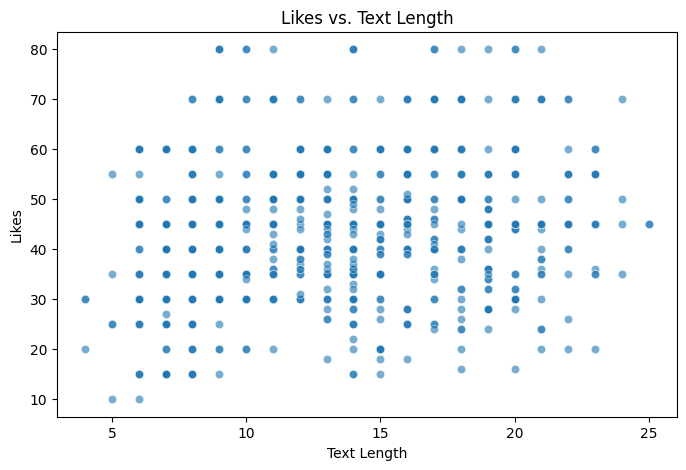

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Text_Length'], y=df['Likes'], alpha=0.6)
plt.xlabel("Text Length")
plt.ylabel("Likes")
plt.title("Likes vs. Text Length")
plt.show()


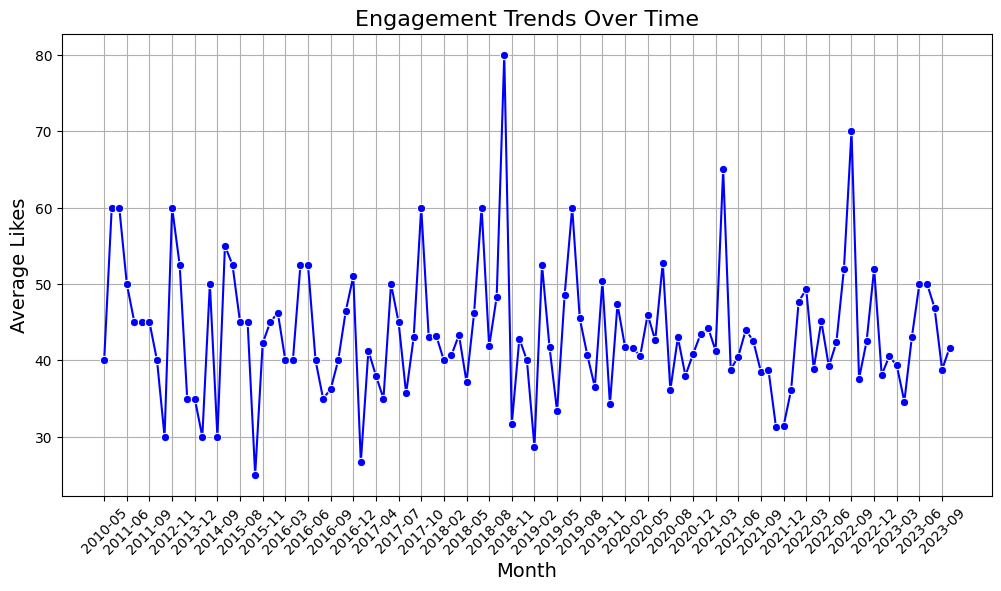

In [14]:
# Convert Timestamp column to datetime if not already
df['Date'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Date'].dt.to_period("M")  # Extract month-year

# Compute average likes per month
monthly_likes = df.groupby('Month')['Likes'].mean()

# Convert index to string for proper plotting
monthly_likes.index = monthly_likes.index.astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_likes.index, y=monthly_likes.values, marker="o", linestyle="-", color="b")

plt.xticks(ticks=monthly_likes.index[::3], rotation=45)  # Show every 3rd month
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Likes", fontsize=14)
plt.title("Engagement Trends Over Time", fontsize=16)
plt.grid(True)
plt.show()


#### Engagement by Country (Bar Plot)

<ipython-input-15-e95d70464f8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_engagement.index[:10], y=country_engagement['Likes'][:10], palette='coolwarm')


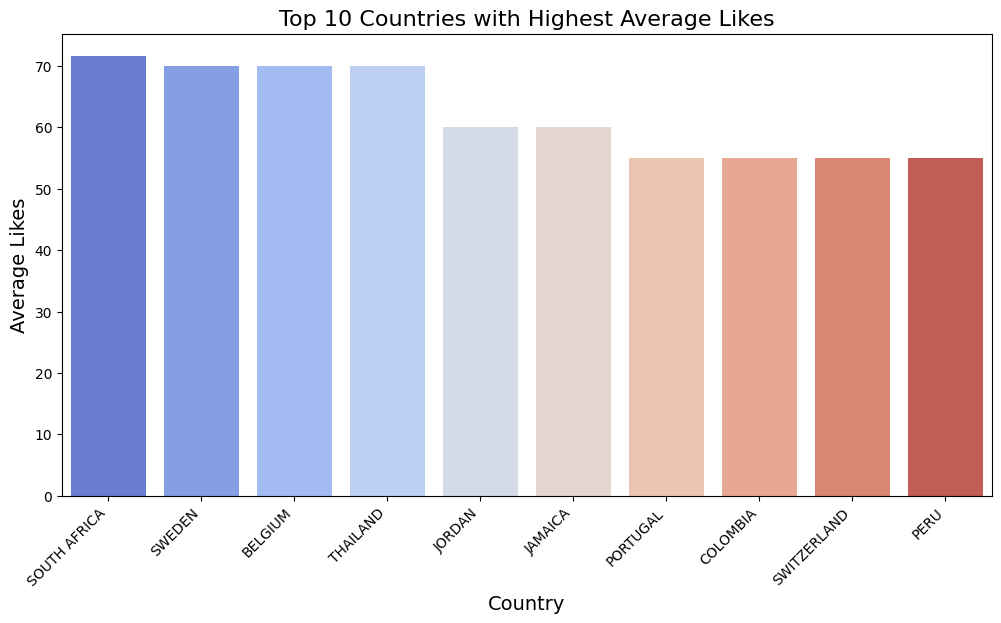

<ipython-input-15-e95d70464f8d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_engagement.index[:10], y=country_engagement['Retweets'][:10], palette='viridis')


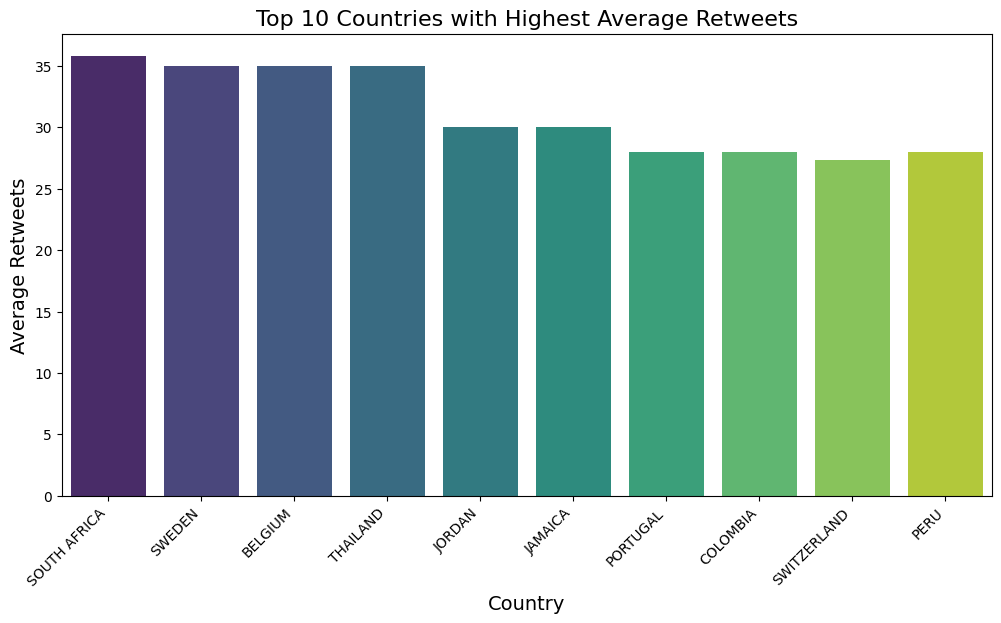

In [15]:
# Group by country and compute average Likes & Retweets
country_engagement = df.groupby('Country')[['Likes', 'Retweets']].mean().sort_values(by='Likes', ascending=False)

# Plot Likes per country
plt.figure(figsize=(12, 6))
sns.barplot(x=country_engagement.index[:10], y=country_engagement['Likes'][:10], palette='coolwarm')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Likes", fontsize=14)
plt.title("Top 10 Countries with Highest Average Likes", fontsize=16)
plt.show()

# Repeat for Retweets
plt.figure(figsize=(12, 6))
sns.barplot(x=country_engagement.index[:10], y=country_engagement['Retweets'][:10], palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Retweets", fontsize=14)
plt.title("Top 10 Countries with Highest Average Retweets", fontsize=16)
plt.show()


#### Sentiments grouped by popularity for different countries

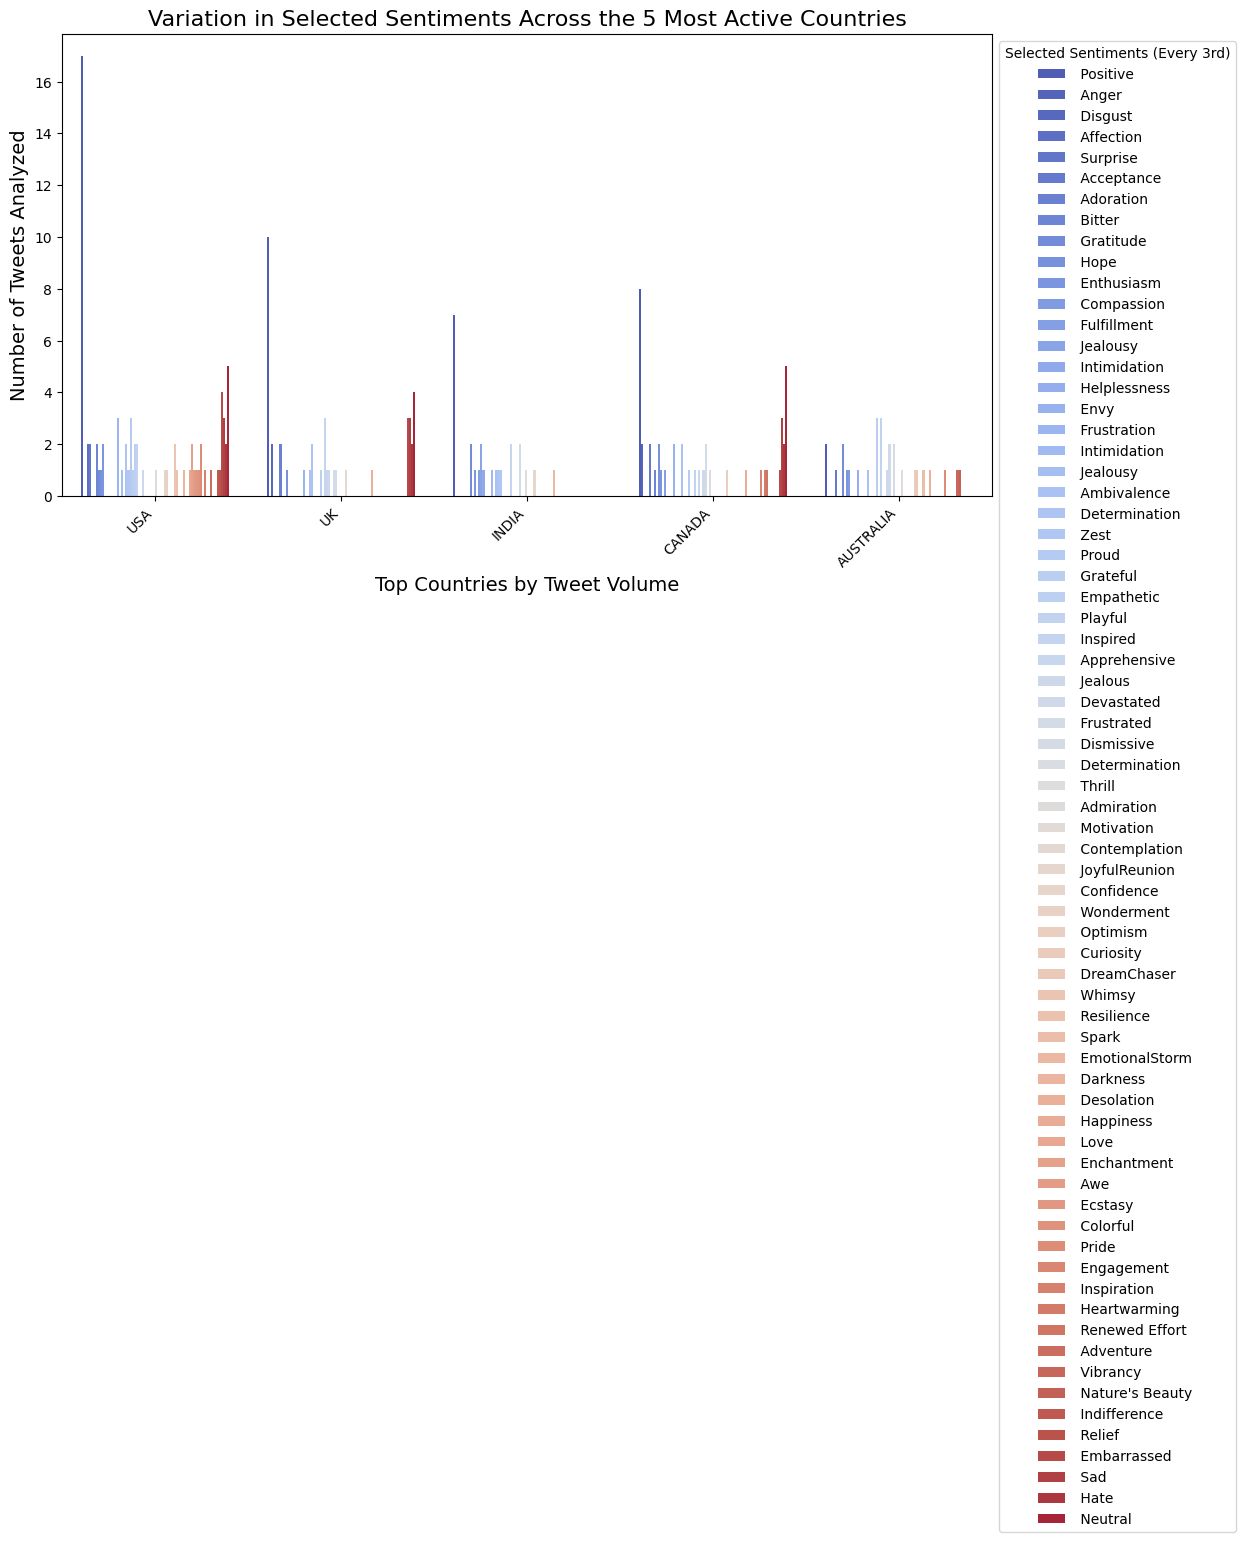

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 most active countries by tweet count
top_n = 5
top_countries = df['Country'].value_counts().nlargest(top_n).index.tolist()

# Filter dataset for selected countries and non-null sentiments
df_filtered = df[df['Country'].isin(top_countries)].dropna(subset=['Sentiment'])

# Get the most common sentiments
sorted_sentiments = df_filtered['Sentiment'].value_counts().index.tolist()

# Select every 3rd sentiment (stride = 3)
selected_sentiments = sorted_sentiments[::3]

# Filter dataset to include only the selected sentiments
df_filtered = df_filtered[df_filtered['Sentiment'].isin(selected_sentiments)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='Country', hue='Sentiment', palette='coolwarm')

# Enhanced axis labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel("Top Countries by Tweet Volume", fontsize=14)
plt.ylabel("Number of Tweets Analyzed", fontsize=14)
plt.title(f"Variation in Selected Sentiments Across the {top_n} Most Active Countries", fontsize=16)

# Move legend for clarity
plt.legend(title="Selected Sentiments (Every 3rd)", bbox_to_anchor=(1, 1), loc="upper left")

plt.show()


### Single Feature

In [17]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tabulate import tabulate

In [18]:
# Download necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Load dataset
df = pd.read_csv("sentimentdataset.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatization and removing stopwords
    return text

# Clean up dataframe and preprocess text
df = df[["Text", "Sentiment"]]
df = df.dropna()
df["Sentiment"] = df["Sentiment"].str.strip()
df["ProcessedText"] = df["Text"].apply(preprocess_text)

# Print initial class distribution
print(f"Original number of samples: {len(df)}")
print(f"Original number of unique sentiments: {df['Sentiment'].nunique()}")

Original number of samples: 732
Original number of unique sentiments: 191


In [20]:
# Encode labels
label_encoder = LabelEncoder()
df["SentimentEncoded"] = label_encoder.fit_transform(df["Sentiment"])

In [21]:
# Encode labels and print distribution
label_encoder = LabelEncoder()
df["SentimentEncoded"] = label_encoder.fit_transform(df["Sentiment"])
class_counts = df["SentimentEncoded"].value_counts()
print(f"Class distribution before filtering (top 10): \n{class_counts.head(10)}")

Class distribution before filtering (top 10): 
SentimentEncoded
146    45
116    44
76     37
40     19
135    18
90     18
46     16
166    15
93     14
50     11
Name: count, dtype: int64


In [22]:
# Remove very rare classes (with only 1 sample)
rare_classes = class_counts[class_counts < 2].index
print(f"Number of classes with only 1 sample (to be removed): {len(rare_classes)}")
df = df[~df["SentimentEncoded"].isin(rare_classes)]

Number of classes with only 1 sample (to be removed): 79


In [23]:
# Re-encode labels after filtering to get consecutive class indices
X = df["ProcessedText"]
y_classes = df["Sentiment"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_classes)

print(f"Number of samples after filtering: {len(df)}")
print(f"Number of unique sentiments after filtering: {len(np.unique(y))}")
print(f"Class distribution after filtering (sample counts): {np.bincount(y)[:10]}...")

Number of samples after filtering: 653
Number of unique sentiments after filtering: 112
Class distribution after filtering (sample counts): [8 3 4 2 3 2 6 3 2 3]...


In [24]:
# Split dataset into test and train
X_train, X_test, y_train, y_test, classes_train, classes_test = train_test_split(
    X, y, y_classes, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set shape: {X_train.shape[0]} samples")
print(f"Test set shape: {X_test.shape[0]} samples")

Train set shape: 522 samples
Test set shape: 131 samples


In [25]:
# Convert text to numerical features
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF features shape: {X_train_tfidf.shape}")

TF-IDF features shape: (522, 5083)


In [26]:
# Apply SMOTE ONLY to the training data to reduce the class imbalance
class_counts_train = np.bincount(y_train)
print(f"Training set class distribution before SMOTE (min: {min(class_counts_train)}, max: {max(class_counts_train)})")

try:
    smote = SMOTE(random_state=42, k_neighbors=1, sampling_strategy='not majority')
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)
    print("SMOTE successfully applied")
    print(f"Training samples after SMOTE: {X_train_resampled.shape[0]}")
    unique, counts = np.unique(y_train_resampled, return_counts=True)
    print(f"Class distribution after SMOTE (min: {min(counts)}, max: {max(counts)})")

except Exception as e:
    print(f"Error applying SMOTE: {e}")
    print("Continuing without SMOTE")
    X_train_resampled, y_train_resampled = X_train_tfidf, y_train

# Convert sparse matrix to dense format before accessing samples
X_train_resampled_duplicate = X_train_resampled.copy()
if hasattr(X_train_resampled_duplicate, "toarray"):
    X_train_resampled_duplicate = X_train_resampled_duplicate.toarray()

# sentences after SMOTE
print("\nSample generated training sentences after SMOTE:")
samples = []
for i in range(5):
    original_index = np.random.randint(0, X_train_resampled_duplicate.shape[0])
    sample_vector = X_train_resampled_duplicate[original_index].reshape(1, -1)
    reconstructed_text = vectorizer.inverse_transform(sample_vector)
    sentence = ' '.join(reconstructed_text[0])
    label_encoded = y_train_resampled[original_index]
    label_value = label_encoder.inverse_transform([label_encoded])[0]

    samples.append([i + 1, sentence, label_value])

df_samples = pd.DataFrame(samples, columns=["Sample #", "Generated Sentence", "Label"])
display(df_samples)

Training set class distribution before SMOTE (min: 2, max: 36)
SMOTE successfully applied
Training samples after SMOTE: 4032
Class distribution after SMOTE (min: 36, max: 36)

Sample generated training sentences after SMOTE:


,Sample #,Generated Sentence,Label
0,1,corruption corruption society corruption stain...,Disgust
1,2,activated art art snacksmuggling backpack back...,Mischievous
2,3,apart apart grief echo echo footstep echo loss...,Grief
3,4,act act kindness day kindness kindness made ma...,Kind
4,5,betrayal building building past fester fester ...,Resentment


In [27]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_resampled.toarray())
X_test_tensor = torch.FloatTensor(X_test_tfidf.toarray())
y_train_tensor = torch.LongTensor(y_train_resampled)
y_test_tensor = torch.LongTensor(y_test)

# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Use a smaller batch size for many classes
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [28]:
# Define an improved PyTorch model(3-layer mlp 1024->512->512) with batch normalization
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, num_classes, dropout_rate=0.3):
        super(SentimentClassifier, self).__init__()
        self.dropout_rate = dropout_rate

        # fully connected layers
        self.fc1 = nn.Linear(input_dim, 1024)
        self.bn1 = nn.BatchNorm1d(1024)

        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)

        # Output layer
        self.fc3 = nn.Linear(512, num_classes)

        # Dropout and activation
        self.dropout = nn.Dropout(dropout_rate)
        self.relu = nn.ReLU()

    def forward(self, x):
        # layers with batch norm, activation, and dropout
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Output layer
        x = self.fc3(x)
        return x

In [29]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
num_classes = len(np.unique(y_train_resampled))
print(f"Building model with {input_dim} input features and {num_classes} output classes")

model = SentimentClassifier(input_dim, num_classes, dropout_rate=0.3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5, verbose=True)

Using device: cuda
Building model with 5083 input features and 112 output classes


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [30]:
# Training function
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return running_loss / total, correct / total

In [31]:
# Evaluation function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return running_loss / total, correct / total, all_preds, all_labels

In [34]:
try:# Loading the best model for final evaluation
  torch.serialization.add_safe_globals([LabelEncoder, np.core.multiarray._reconstruct])
  checkpoint = torch.load('best_sentiment_model.pth', weights_only=False) # Explicitly set weights_only=False
  model.load_state_dict(checkpoint['model_state_dict'])
  print(f"Loaded best model from epoch {checkpoint['epoch']+1} with validation accuracy: {checkpoint['accuracy']:.4f}")
except FileNotFoundError:
  print("Best model file not found. Continuing with current model state.")


Best model file not found. Continuing with current model state.


<ipython-input-34-03c42fa76b57>:2: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.
  torch.serialization.add_safe_globals([LabelEncoder, np.core.multiarray._reconstruct])


In [35]:
# Training loop with early stopping
num_epochs = 500
best_accuracy = 0.0
patience = 50
no_improvement = 0

try:
    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, _, _ = evaluate(model, test_loader, criterion, device)

        # Learning rate scheduler based on validation loss
        scheduler.step(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Saving best model and check for early stopping
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'accuracy': val_acc,
                'label_encoder': label_encoder
            }, 'best_sentiment_model.pth')
            print(f'Model saved at epoch {epoch+1} with validation accuracy: {val_acc:.4f}')
            no_improvement = 0
        else:
            no_improvement += 1
            if no_improvement == patience:
                print(f'Early stopping after {patience} epochs without improvement')
                break

except KeyboardInterrupt:
    print("Training interrupted!")

Epoch 1/500, Train Loss: 0.7398, Train Acc: 0.8901, Val Loss: 2.3157, Val Acc: 0.5115
Model saved at epoch 1 with validation accuracy: 0.5115
Epoch 2/500, Train Loss: 0.0148, Train Acc: 0.9975, Val Loss: 2.3077, Val Acc: 0.5115
Epoch 3/500, Train Loss: 0.0079, Train Acc: 0.9988, Val Loss: 2.7039, Val Acc: 0.4580
Epoch 4/500, Train Loss: 0.0028, Train Acc: 0.9998, Val Loss: 2.6548, Val Acc: 0.4809
Epoch 5/500, Train Loss: 0.0067, Train Acc: 0.9993, Val Loss: 2.3012, Val Acc: 0.5420
Model saved at epoch 5 with validation accuracy: 0.5420
Epoch 6/500, Train Loss: 0.0041, Train Acc: 0.9995, Val Loss: 2.2991, Val Acc: 0.5420
Epoch 7/500, Train Loss: 0.0025, Train Acc: 1.0000, Val Loss: 2.3462, Val Acc: 0.5496
Model saved at epoch 7 with validation accuracy: 0.5496
Epoch 8/500, Train Loss: 0.0059, Train Acc: 0.9995, Val Loss: 2.1609, Val Acc: 0.5878
Model saved at epoch 8 with validation accuracy: 0.5878
Epoch 9/500, Train Loss: 0.0046, Train Acc: 0.9995, Val Loss: 2.2755, Val Acc: 0.5725
Ep

#### Final Evaluation


Final Test Accuracy: 0.6565
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.00      0.00         1
           2       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           9       1.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         1
          15       0.33      1.00      0.50         1
          16       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         1
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00     

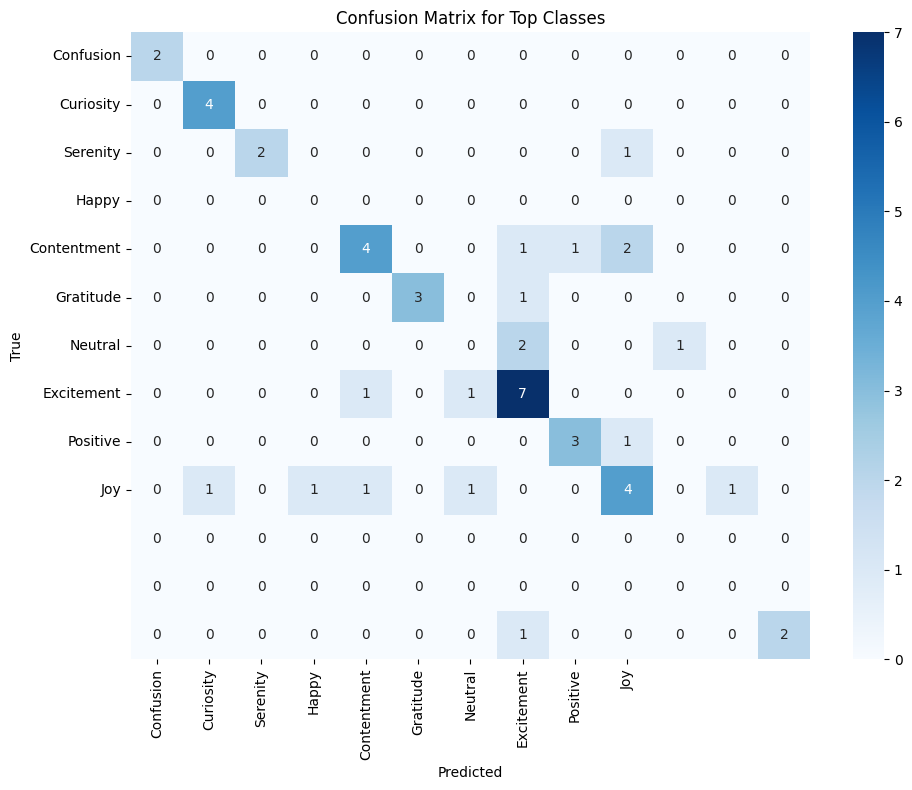

In [36]:
# Final evaluation on test set
test_loss, test_acc, all_preds, all_labels = evaluate(model, test_loader, criterion, device)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print("Classification Report:\n", classification_report(all_labels, all_preds, zero_division=1))

# Converting numeric predictions back to original sentiment labels
predicted_classes = label_encoder.inverse_transform(all_preds)
true_classes = label_encoder.inverse_transform(all_labels)

try:
    # Get most frequent classes
    top_class_indices = np.argsort(np.bincount(all_labels))[-10:]  # Top 10 classes
    mask = np.isin(all_labels, top_class_indices)

    if np.sum(mask) > 0:  # If we have any samples from top classes
        cm = confusion_matrix(
            [true_classes[i] for i in range(len(true_classes)) if mask[i]],
            [predicted_classes[i] for i in range(len(predicted_classes)) if mask[i]]
        )

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=[label_encoder.inverse_transform([i])[0] for i in top_class_indices],
                   yticklabels=[label_encoder.inverse_transform([i])[0] for i in top_class_indices])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix for Top Classes')
        plt.tight_layout()
        plt.savefig('confusion_matrix.png')
        print("Confusion matrix saved to 'confusion_matrix.png'")
except ImportError:
    print("Matplotlib or seaborn not available for confusion matrix visualization")


#### Custom Test Sentences

In [37]:
# Function to predict sentiment for new text
def predict_sentiment(text, model, vectorizer, label_encoder, device):
    processed_text = preprocess_text(text)
    text_tfidf = vectorizer.transform([processed_text]).toarray()
    text_tensor = torch.FloatTensor(text_tfidf).to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(text_tensor)
        _, predicted = torch.max(outputs, 1)
    predicted_sentiment = label_encoder.inverse_transform(predicted.cpu().numpy())[0]

    return predicted_sentiment

# Example of prediction function usage
print("\nExample prediction function:")
print("predict_sentiment('I love this product!', model, vectorizer, label_encoder, device)")


Example prediction function:
predict_sentiment('I love this product!', model, vectorizer, label_encoder, device)


### Multi Feature

In [38]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from datetime import datetime

import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [40]:
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

df = pd.read_csv("./sentimentdataset.csv")

In [41]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [42]:
def extract_nlp_features(text):
    sid = SentimentIntensityAnalyzer()

    # Check if text is empty
    if not text or pd.isna(text):
        return pd.Series({
            'text_length': 0,
            'word_count': 0,
            'avg_word_length': 0,
            'vader_compound': 0,
            'vader_neg': 0,
            'vader_neu': 0,
            'vader_pos': 0
        })

    text = str(text)

    # Get sentiment scores
    sentiment_scores = sid.polarity_scores(text)

    # Extract text statistics
    words = text.split()
    word_count = len(words)
    text_length = len(text)
    avg_word_length = text_length / max(word_count, 1)

    return pd.Series({
        'text_length': text_length,
        'word_count': word_count,
        'avg_word_length': avg_word_length,
        'vader_compound': sentiment_scores['compound'],
        'vader_neg': sentiment_scores['neg'],
        'vader_neu': sentiment_scores['neu'],
        'vader_pos': sentiment_scores['pos']
    })

In [43]:
def create_time_features(df):
    time_cols = ['Year', 'Month', 'Day', 'Hour']
    for col in time_cols:
        df[col.lower()] = pd.to_numeric(df[col], errors='coerce')

    df['is_weekend'] = df['Day'].apply(lambda x: 1 if x in [5, 6] else 0)
    return df

In [44]:
def create_engagement_features(df):
    df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').fillna(0)
    df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce').fillna(0)
    df['total_engagement'] = df['Likes'] + df['Retweets']
    df['engagement_ratio'] = df['Retweets'] / df['Likes'].replace(0, 1)
    return df

In [45]:
# Clean up dataframe and preprocess text
print("Preprocessing data...")
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], errors='ignore')
df = df.dropna()
df["Sentiment"] = df["Sentiment"].str.strip()

# Preprocess text and create NLP features
df["ProcessedText"] = df["Text"].apply(preprocess_text)
nlp_features = df["Text"].apply(extract_nlp_features)
df = pd.concat([df, nlp_features], axis=1)

# Create time features
df = create_time_features(df)

# Create engagement features
df = create_engagement_features(df)

# Print initial class distribution
print(f"Original number of samples: {len(df)}")
print(f"Original number of unique sentiments: {df['Sentiment'].nunique()}")

Preprocessing data...
Original number of samples: 732
Original number of unique sentiments: 191


In [46]:
# Encode labels and print distribution
label_encoder = LabelEncoder()
df["SentimentEncoded"] = label_encoder.fit_transform(df["Sentiment"])
class_counts = df["SentimentEncoded"].value_counts()
print(f"Class distribution before filtering (top 10): \n{class_counts.head(10)}")

# Remove very rare classes (with only 1 sample)
rare_classes = class_counts[class_counts < 2].index
print(f"Number of classes with only 1 sample (to be removed): {len(rare_classes)}")
df = df[~df["SentimentEncoded"].isin(rare_classes)]

# Re-encode labels after filtering to get consecutive class indices
X = df["ProcessedText"]
y_classes = df["Sentiment"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_classes)

print(f"Number of samples after filtering: {len(df)}")
print(f"Number of unique sentiments after filtering: {len(np.unique(y))}")
print(f"Class distribution after filtering (sample counts): {np.bincount(y)[:10]}...")

Class distribution before filtering (top 10): 
SentimentEncoded
146    45
116    44
76     37
40     19
135    18
90     18
46     16
166    15
93     14
50     11
Name: count, dtype: int64
Number of classes with only 1 sample (to be removed): 79
Number of samples after filtering: 653
Number of unique sentiments after filtering: 112
Class distribution after filtering (sample counts): [8 3 4 2 3 2 6 3 2 3]...


In [47]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test, classes_train, classes_test = train_test_split(
    X, y, y_classes, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set shape: {X_train.shape[0]} samples")
print(f"Test set shape: {X_test.shape[0]} samples")

Train set shape: 522 samples
Test set shape: 131 samples


In [48]:
# Convert text to numerical features
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF features shape: {X_train_tfidf.shape}")

TF-IDF features shape: (522, 4980)


In [49]:
# Apply SMOTE ONLY to the training data
class_counts_train = np.bincount(y_train)
print(f"Training set class distribution before SMOTE (min: {min(class_counts_train)}, max: {max(class_counts_train)})")

try:
    smote = SMOTE(random_state=42, k_neighbors=1, sampling_strategy='not majority')
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)
    print("SMOTE successfully applied")
    print(f"Training samples after SMOTE: {X_train_resampled.shape[0]}")
    unique, counts = np.unique(y_train_resampled, return_counts=True)
    print(f"Class distribution after SMOTE (min: {min(counts)}, max: {max(counts)})")
except Exception as e:
    print(f"Error applying SMOTE: {e}")
    print("Continuing without SMOTE")
    X_train_resampled, y_train_resampled = X_train_tfidf, y_train

Training set class distribution before SMOTE (min: 2, max: 36)
SMOTE successfully applied
Training samples after SMOTE: 4032
Class distribution after SMOTE (min: 36, max: 36)


In [50]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_resampled.toarray())
X_test_tensor = torch.FloatTensor(X_test_tfidf.toarray())
y_train_tensor = torch.LongTensor(y_train_resampled)
y_test_tensor = torch.LongTensor(y_test)

# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Use a smaller batch size for many classes
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [51]:
# Define an improved PyTorch model(3-layer mlp 1024->512->512) with batch normalization
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, num_classes, dropout_rate=0.3):
        super(SentimentClassifier, self).__init__()
        self.dropout_rate = dropout_rate

        # fully connected layers
        self.fc1 = nn.Linear(input_dim, 1024)
        self.bn1 = nn.BatchNorm1d(1024)

        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)

        # Output layer
        self.fc3 = nn.Linear(512, num_classes)

        # Dropout and activation
        self.dropout = nn.Dropout(dropout_rate)
        self.relu = nn.ReLU()

    def forward(self, x):
        # layers with batch norm, activation, and dropout
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Output layer
        x = self.fc3(x)
        return x

In [52]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
num_classes = len(np.unique(y_train_resampled))
print(f"Building model with {input_dim} input features and {num_classes} output classes")

model = SentimentClassifier(input_dim, num_classes, dropout_rate=0.3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5, verbose=True)

Using device: cuda
Building model with 4980 input features and 112 output classes


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [53]:
# Training function
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return running_loss / total, correct / total

# Evaluation function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return running_loss / total, correct / total, all_preds, all_labels

Epoch 1/300, Train Loss: 0.7289, Train Acc: 0.8948, Val Loss: 2.5703, Val Acc: 0.4656
Model saved at epoch 1 with validation accuracy: 0.4656
Epoch 2/300, Train Loss: 0.0150, Train Acc: 0.9973, Val Loss: 2.3957, Val Acc: 0.5496
Model saved at epoch 2 with validation accuracy: 0.5496
Epoch 3/300, Train Loss: 0.0072, Train Acc: 0.9993, Val Loss: 2.2455, Val Acc: 0.5725
Model saved at epoch 3 with validation accuracy: 0.5725
Epoch 4/300, Train Loss: 0.0048, Train Acc: 0.9993, Val Loss: 2.3690, Val Acc: 0.5267
Epoch 5/300, Train Loss: 0.0057, Train Acc: 0.9993, Val Loss: 2.0592, Val Acc: 0.5573
Epoch 6/300, Train Loss: 0.0074, Train Acc: 0.9990, Val Loss: 2.0899, Val Acc: 0.5420
Epoch 7/300, Train Loss: 0.0090, Train Acc: 0.9988, Val Loss: 1.8799, Val Acc: 0.6260
Model saved at epoch 7 with validation accuracy: 0.6260
Epoch 8/300, Train Loss: 0.0144, Train Acc: 0.9973, Val Loss: 2.2364, Val Acc: 0.5420
Epoch 9/300, Train Loss: 0.0106, Train Acc: 0.9980, Val Loss: 2.1247, Val Acc: 0.5496
Ep

<ipython-input-54-e5a2b13da6c6>:40: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.
  torch.serialization.add_safe_globals([LabelEncoder, np.core.multiarray._reconstruct])


Confusion matrix saved to 'confusion_matrix.png'

Example prediction function:
predict_sentiment('I love this product!', model, vectorizer, label_encoder, device)


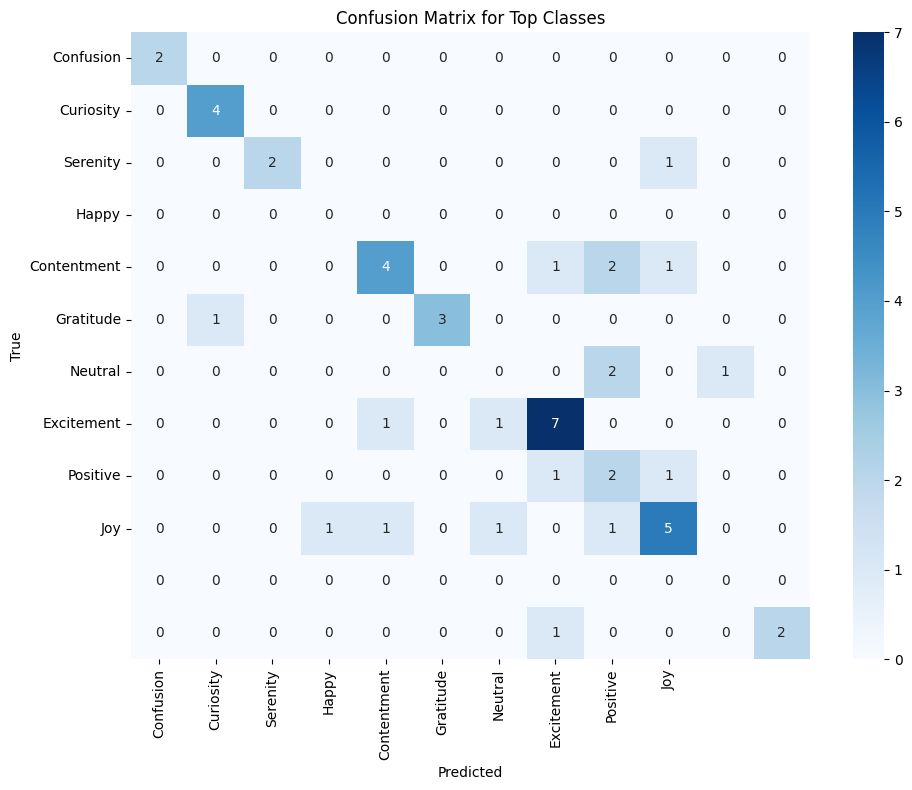

In [54]:
# Training loop with early stopping
num_epochs = 300
best_accuracy = 0.0
patience = 50
no_improvement = 0

try:
    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, _, _ = evaluate(model, test_loader, criterion, device)

        # Learning rate scheduler based on validation loss
        scheduler.step(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Saving best model and check for early stopping
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'accuracy': val_acc,
                'label_encoder': label_encoder
            }, 'best_sentiment_model.pth')
            print(f'Model saved at epoch {epoch+1} with validation accuracy: {val_acc:.4f}')
            no_improvement = 0
        else:
            no_improvement += 1
            if no_improvement == patience:
                print(f'Early stopping after {patience} epochs without improvement')
                break

except KeyboardInterrupt:
    print("Training interrupted!")

# Loading the best model for final evaluation
try:
    torch.serialization.add_safe_globals([LabelEncoder, np.core.multiarray._reconstruct])
    checkpoint = torch.load('best_sentiment_model.pth', weights_only=False) # Explicitly set weights_only=False
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Loaded best model from epoch {checkpoint['epoch']+1} with validation accuracy: {checkpoint['accuracy']:.4f}")
except FileNotFoundError:
    print("Best model file not found. Continuing with current model state.")

# Final evaluation on test set
test_loss, test_acc, all_preds, all_labels = evaluate(model, test_loader, criterion, device)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print("Classification Report:\n", classification_report(all_labels, all_preds, zero_division=1))

# Convert numeric predictions back to original sentiment labels
predicted_classes = label_encoder.inverse_transform(all_preds)
true_classes = label_encoder.inverse_transform(all_labels)

try:

    top_class_indices = np.argsort(np.bincount(all_labels))[-10:]  # Top 10 classes
    mask = np.isin(all_labels, top_class_indices)

    if np.sum(mask) > 0:  # If we have any samples from top classes
        cm = confusion_matrix(
            [true_classes[i] for i in range(len(true_classes)) if mask[i]],
            [predicted_classes[i] for i in range(len(predicted_classes)) if mask[i]]
        )

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=[label_encoder.inverse_transform([i])[0] for i in top_class_indices],
                   yticklabels=[label_encoder.inverse_transform([i])[0] for i in top_class_indices])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix for Top Classes')
        plt.tight_layout()
        plt.savefig('confusion_matrix.png')
        print("Confusion matrix saved to 'confusion_matrix.png'")
except ImportError:
    print("Matplotlib or seaborn not available for confusion matrix visualization")

def predict_sentiment(text, model, vectorizer, label_encoder, device):
    processed_text = preprocess_text(text)
    text_tfidf = vectorizer.transform([processed_text]).toarray()
    text_tensor = torch.FloatTensor(text_tfidf).to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(text_tensor)
        _, predicted = torch.max(outputs, 1)

    predicted_sentiment = label_encoder.inverse_transform(predicted.cpu().numpy())[0]

    return predicted_sentiment

# Example of prediction function usage
print("\nExample prediction function:")
print("predict_sentiment('I love this product!', model, vectorizer, label_encoder, device)")